# 📢 Publicación en Inglés
✨ **🐍 Python | Convert Images to ASCII 🎨**

❓ Did you know you can turn any image into ASCII art with just a few lines of code? 🤯

👉 With **PIL** and **NumPy**, you can convert images into text, creating a unique visual representation of any photo.

### 🔧 How does it work?
✦ The image is loaded and converted to grayscale.  
✦ The resolution is reduced to fit the text size.  
✦ Pixels are mapped to ASCII characters based on intensity.

### 🔎 Why does it matter?
🌍 **Optimization**: Store images as text, saving space.  
🎨 **Creativity**: Perfect for generative art and visual effects.  
📜 **Documentation**: Visual representation without image formats.

### ✨ Real-World Use Case:
Imagine working with image monitoring in low-connectivity environments 📡. Converting images to ASCII lets you transmit them as text, reducing file size and making storage easier.

### ⚙️ Business Impact:
💾 Reduce storage costs for images in constrained environments.  
💻 Enable alternative image visualization in text-based terminals.  
🎬 Useful for digital art and special effects in creative fields.

### 📊 Code Summary:
✅ Converts images to grayscale.  
✅ Downscales to match ASCII character dimensions.  
✅ Generates an ASCII-formatted image.

🔗[Github](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main)

💭 **Where would you apply this technique in your daily work?**

🔑 #Python #MachineLearning #AI #DataScience #DeepLearning #ASCIIArt #Coding #GenerativeAI #TechInnovation #OpenSource #DigitalArt

---

# 📢 Publicación en Español
✨ **🐍 Python | Convierte Imágenes en ASCII 🎨**

❓ ¿Sabías que puedes transformar cualquier imagen en arte ASCII con unas pocas líneas de código? 🤯

👉 Con **PIL** y **NumPy**, puedes convertir imágenes en texto, logrando una representación visual única de cualquier foto.

### 🔧 ¿Cómo funciona?
✦ Se carga la imagen y se convierte a escala de grises.  
✦ Se reduce su resolución para adaptarla al tamaño del texto.  
✦ Se mapean los píxeles a caracteres ASCII según su intensidad.

### 🔎 ¿Por qué importa?
🌍 **Optimización**: Puedes almacenar imágenes como texto, ahorrando espacio.  
🎨 **Creatividad**: Perfecto para arte generativo y efectos visuales.  
📜 **Documentación**: Representación visual sin depender de formatos de imagen.

### ✨ Ejemplo real o Caso práctico:
Supón que trabajas en un sistema de monitoreo de imágenes en entornos de baja conectividad 📡. Convertir imágenes en ASCII permite transmitirlas como texto, reduciendo el peso y facilitando su almacenamiento en bases de datos.

### ⚙️ Impacto en el negocio:
💾 Menor almacenamiento de imágenes en sistemas con limitaciones.  
💻 Alternativa accesible para visualizar imágenes en terminales.  
🎬 Aplicable en arte digital y generación de efectos visuales.

### 📊 Resumen del código:
✅ Convierte imágenes en escala de grises.  
✅ Reduce su tamaño para adaptarse a caracteres ASCII.  
✅ Genera una imagen en formato ASCII.

🔗[Github](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main)

💭 **¿Dónde usarías esta técnica en tu día a día?**

🔑 #Python #MachineLearning #AI #DataScience #DeepLearning #ASCIIArt #Coding #GenerativeAI #TechInnovation #OpenSource #DigitalArt

---

In [2]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# Define ASCII characters from darkest to lightest
ASCII_CHARS = "@%#*+=-:. "

def image_to_ascii(image_path, new_width=100):
    """
    Converts an image to ASCII representation.
    
    Parameters:
    - image_path (str): URL or local path of the image.
    - new_width (int): Desired width of the ASCII output.
    
    Returns:
    - str: ASCII representation of the image.
    """

    # Open the image (download if URL)
    if image_path.startswith("http"):
        response = requests.get(image_path)
        img = Image.open(BytesIO(response.content))
    else:
        img = Image.open(image_path)
    
    # Convert image to grayscale
    img = img.convert("L")
    
    # Calculate new height to maintain aspect ratio
    aspect_ratio = img.height / img.width
    new_height = int(new_width * aspect_ratio * 0.55)  # Adjust for character aspect ratio
    
    # Resize the image
    img = img.resize((new_width, new_height))

    # Convert pixels to ASCII characters
    pixels = np.array(img)
    ascii_image = "\n".join("".join(ASCII_CHARS[pixel // 25] for pixel in row) for row in pixels)

    return ascii_image

# Example: Convert an image to ASCII (You can replace the URL with any image URL)
image_url = "https://upload.wikimedia.org/wikipedia/commons/6/6a/JavaScript-logo.png"
ascii_art = image_to_ascii(image_url, new_width=80)

# Print ASCII image
print(ascii_art)


................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
............................

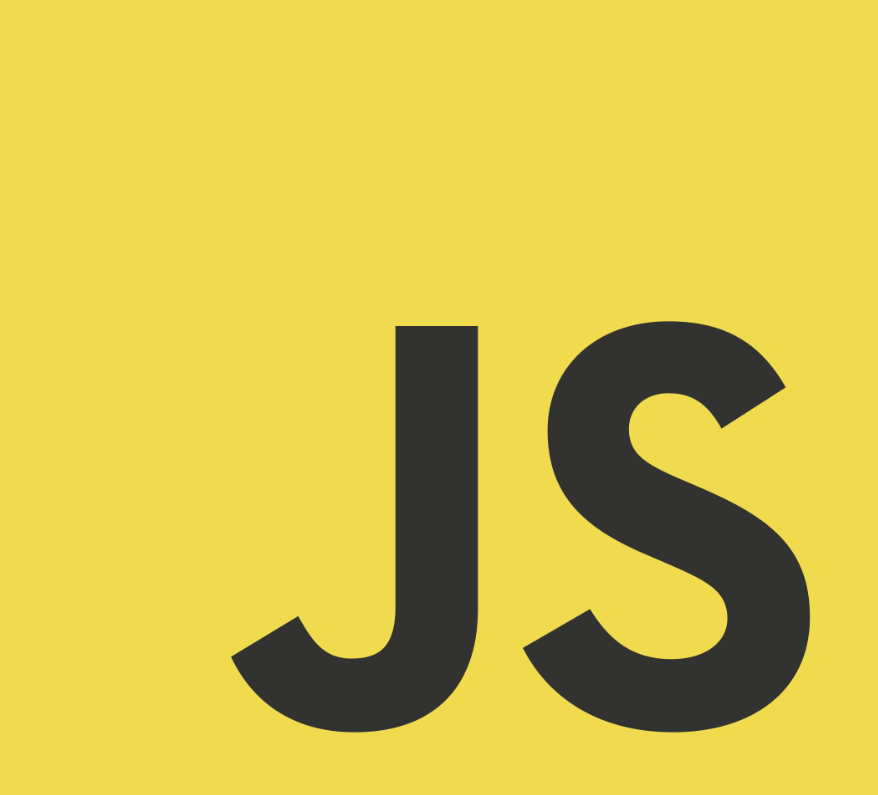